In [198]:
from zget_data import get_responses, get_qdetails, get_questions
from collections import defaultdict
import pandas as pd
import json

In [199]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [200]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []
}

In [201]:
password_response, time_response, survey_response, dids = get_responses()

In [202]:
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,Chevy68#,NaN,NaN,NaN
2,igahot6844$,NaN,NaN,NaN
3,Password123!,NaN,NaN,NaN
4,ihtgoojd24,NaN,NaN,NaN
5,Bwmfd1!,NaN,NaN,NaN
6,IWTCDTE!,NaN,NaN,NaN
7,MD!wtsf,NaN,NaN,NaN
8,6754$#,NaN,NaN,NaN
9,victor12,NaN,NaN,NaN


In [203]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
2,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
3,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283
4,5.453,28.630,15.469,29.669,147.708,243.538,12.105,96.265,8.017,70.176,15.129,48.560,12.011983
5,390.267,33.952,8.106,44.250,45.859,108.347,13.635,41.843,12.956,54.012,12.891,47.699,13.563617
6,5.027,10.247,9.382,129.634,38.683,218.244,10.890,51.043,13.859,28.621,9.081,34.495,9.320100
7,4.906,17.022,13.134,105.295,60.117,183.871,13.250,34.445,28.712,33.622,18.875,37.998,9.187450
8,5.307,6.465,8.567,4.670,35.472,165.960,10.517,22.076,14.942,39.105,10.935,20.554,5.742833
9,2.940,12.141,3.681,6.817,39.180,71.572,9.222,35.332,11.988,27.655,11.361,24.696,4.276417


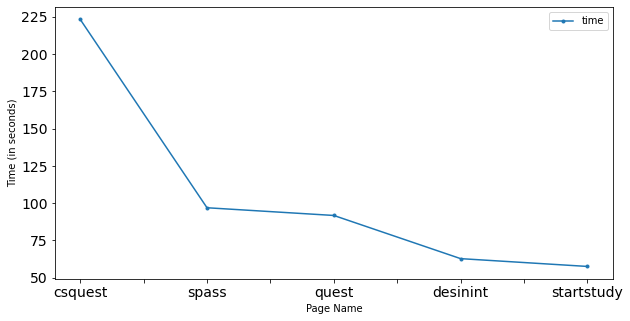

In [204]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [205]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,12,3,7,14
0,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '3'}","{'1-13': '2', '1-17': '7', '1-15': '7', '1-14'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."
1,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-15': '6', '1-13': '2', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-..."
2,"{'6-1': '1', '7-1': '5', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '5', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-12': '2', '1-14'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'..."
3,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '5...","{'1-1': '5', '2-1': '4', '3-1': '1', '3-2': '1...","{'1-1': '7', '1-2': '5', '1-3': '6', '1-4': '4'}","{'1-17': '4', '1-13': '6', '1-16': '5', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'..."
4,"{'1-3': '5', '1-8': '5', '1-7': '5', '1-6': '5...","{'1-1': '5', '2-1': '3', '3-1': '2', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-11': '5', '1-13': '3', '1-15': '5', '1-12'...","{'1-1': 'Man', '2-1': 'Above 65 years old', '3..."
5,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '7...","{'1-1': '6', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-12': '3', '1-15': '6', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '60-64 years old', '3-..."
6,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-17': '7', '1-12'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
7,"{'6-1': '1', '7-1': '4', '7-2': '5', '7-3': '6...","{'1-1': '5', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '7', '1-2': '1', '1-3': '1', '1-4': '5'}","{'1-15': '6', '1-17': '7', '1-11': '7', '1-12'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."
8,"{'6-1': '1', '7-1': '6', '7-2': '4', '7-3': '6...","{'1-1': '4', '2-1': '6', '3-1': '6', '3-2': '3...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '5'}","{'1-14': '7', '1-16': '4', '1-17': '6', '1-12'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."
9,"{'6-1': '1', '7-1': '4', '7-2': '4', '7-3': '4...","{'1-1': '5', '2-1': '5', '3-1': '5', '3-2': '5...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '4'}","{'1-13': '6', '1-17': '5', '1-12': '5', '1-11'...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-..."


In [206]:
survey_response_df['did'] = dids
survey_response_df.groupby(by='did').count()

,8,12,3,7,14
did,,,,,
1,8,8,8,8,8
2,8,8,8,8,8
3,8,8,8,8,8
4,6,6,6,6,6


### Attention Check

In [207]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   },
   '12': {
      '4-1': 2
   }
}

In [208]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the second option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [209]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

In [210]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive.value_counts()

attentive
True         30
dtype: int64

In [211]:
survey_response_df['attention'] = attentive['attentive'].values
survey_response_df = survey_response_df.loc[survey_response_df['attention'] == True]
survey_response_df

,8,12,3,7,14,did,attention
0,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '3'}","{'1-13': '2', '1-17': '7', '1-15': '7', '1-14'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-...",1,True
1,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-15': '6', '1-13': '2', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-...",4,True
2,"{'6-1': '1', '7-1': '5', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '5', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-12': '2', '1-14'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'...",4,True
3,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '5...","{'1-1': '5', '2-1': '4', '3-1': '1', '3-2': '1...","{'1-1': '7', '1-2': '5', '1-3': '6', '1-4': '4'}","{'1-17': '4', '1-13': '6', '1-16': '5', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...",2,True
4,"{'1-3': '5', '1-8': '5', '1-7': '5', '1-6': '5...","{'1-1': '5', '2-1': '3', '3-1': '2', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-11': '5', '1-13': '3', '1-15': '5', '1-12'...","{'1-1': 'Man', '2-1': 'Above 65 years old', '3...",3,True
5,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '7...","{'1-1': '6', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-12': '3', '1-15': '6', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '60-64 years old', '3-...",3,True
6,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-17': '7', '1-12'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",2,True
7,"{'6-1': '1', '7-1': '4', '7-2': '5', '7-3': '6...","{'1-1': '5', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '7', '1-2': '1', '1-3': '1', '1-4': '5'}","{'1-15': '6', '1-17': '7', '1-11': '7', '1-12'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-...",2,True
8,"{'6-1': '1', '7-1': '6', '7-2': '4', '7-3': '6...","{'1-1': '4', '2-1': '6', '3-1': '6', '3-2': '3...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '5'}","{'1-14': '7', '1-16': '4', '1-17': '6', '1-12'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...",3,True
9,"{'6-1': '1', '7-1': '4', '7-2': '4', '7-3': '4...","{'1-1': '5', '2-1': '5', '3-1': '5', '3-2': '5...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '4'}","{'1-13': '6', '1-17': '5', '1-12': '5', '1-11'...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-...",2,True


In [212]:
survey_response_df.groupby(by='did').count()

,8,12,3,7,14,attention
did,,,,,,
1,8,8,8,8,8,8
2,8,8,8,8,8,8
3,8,8,8,8,8,8
4,6,6,6,6,6,6


In [213]:
questions = get_questions()

### First Password Survey Analysis

In [214]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [215]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1-1,6,2,6,7,5,6,2,7,4,6,...,6,6,3,6,6,3,2,2,5,5
1-2,5,6,5,5,7,5,6,1,6,5,...,5,7,5,6,4,7,7,7,2,5
1-3,4,6,5,6,7,6,6,1,6,4,...,5,6,6,6,6,6,7,7,7,4
1-4,3,1,2,4,1,2,2,5,5,4,...,7,6,3,2,2,1,1,2,2,3


In [216]:
# fpasssurvey
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,median
"I do not change my passwords, unless I have to.",6,2,6,7,5,6,2,7,4,6,...,6,3,6,6,3,2,2,5,5,6.0
I use different passwords for different online accounts that I have.,5,6,5,5,7,5,6,1,6,5,...,7,5,6,4,7,7,7,2,5,5.5
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,6,5,6,7,6,6,1,6,4,...,6,6,6,6,6,7,7,7,4,6.0
I do not include special characters in my password if it’s not required.,3,1,2,4,1,2,2,5,5,4,...,6,3,2,2,1,1,2,2,3,2.5


In [217]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [218]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,mean
1-13,2,2,2,6,3,2,3,4,7,6,...,3,2,4,2,1,2,2,1,5,2.866667
1-17,7,7,5,4,6,6,7,7,6,5,...,7,6,3,7,7,6,7,4,4,5.866667
1-15,7,6,5,5,5,6,6,6,5,5,...,7,6,5,7,7,6,7,2,4,5.633333
1-14,7,6,6,3,5,6,6,6,7,6,...,7,6,4,7,7,6,7,5,4,5.900000
1-16,1,2,3,5,2,2,3,2,4,5,...,2,2,4,1,1,2,1,3,5,2.400000
1-12,1,2,2,6,2,3,2,2,2,5,...,1,2,4,2,1,4,1,1,4,2.333333
1-11,7,6,6,3,5,6,6,7,4,6,...,7,6,5,7,7,6,7,7,3,5.900000
1-6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7.000000
1-3,5,7,6,3,6,3,6,7,6,4,...,5,6,3,7,7,6,6,1,2,4.933333
1-8,6,6,6,2,4,4,4,6,4,5,...,5,5,4,5,7,4,6,6,2,4.833333


In [219]:
# quest
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,mean
rewarding,6.0,6.0,6.0,2.0,5.0,6.0,5.0,4.0,1.0,2.0,...,5.0,6.0,4.0,6.0,7.0,6.0,6.0,7.0,3.0,5.133333
organized,7.0,7.0,5.0,4.0,6.0,6.0,7.0,7.0,6.0,5.0,...,7.0,6.0,3.0,7.0,7.0,6.0,7.0,4.0,4.0,5.866667
structured,7.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,5.0,...,7.0,6.0,5.0,7.0,7.0,6.0,7.0,2.0,4.0,5.633333
well grouped,7.0,6.0,6.0,3.0,5.0,6.0,6.0,6.0,7.0,6.0,...,7.0,6.0,4.0,7.0,7.0,6.0,7.0,5.0,4.0,5.900000
ordered,7.0,6.0,5.0,3.0,6.0,6.0,5.0,6.0,4.0,3.0,...,6.0,6.0,4.0,7.0,7.0,6.0,7.0,5.0,3.0,5.600000
beneficial,7.0,6.0,6.0,2.0,6.0,5.0,6.0,6.0,6.0,3.0,...,7.0,6.0,4.0,6.0,7.0,4.0,7.0,7.0,4.0,5.666667
helpful,7.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,4.0,6.0,...,7.0,6.0,5.0,7.0,7.0,6.0,7.0,7.0,3.0,5.900000
select rightmost circle,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000
easy,5.0,7.0,6.0,3.0,6.0,3.0,6.0,7.0,6.0,4.0,...,5.0,6.0,3.0,7.0,7.0,6.0,6.0,1.0,2.0,4.933333
appealing,6.0,6.0,6.0,2.0,4.0,4.0,4.0,6.0,4.0,5.0,...,5.0,5.0,4.0,5.0,7.0,4.0,6.0,6.0,2.0,4.833333


In [220]:
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
6-1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7-1,6,6,5,6,7,6,6,4,6,4,...,1,6,6,6,5,7,7,6,7,5
7-2,5,6,6,5,7,6,5,5,4,4,...,1,6,6,6,4,7,7,6,6,5
7-3,6,6,6,5,7,7,6,6,6,4,...,1,7,6,6,4,7,7,7,7,5
8-1,7,6,6,5,6,6,6,6,3,5,...,1,6,7,3,7,7,7,6,7,6
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Financial Websites, Government Websites, Cour...","[Social Media, Email]",...,[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Social Media, E-commerce Websites]","[Social Media, Email, Course Management Websit...","[Email, Financial Websites, Government Website...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Financial Websites, Gaming Webs...",[Social Media]
2-1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3-1,7,6,6,6,7,7,7,4,3,5,...,1,7,6,6,6,7,7,7,7,6
3-2,6,6,6,4,6,7,7,6,5,4,...,1,7,6,6,7,7,7,6,7,5
3-3,6,6,6,5,7,7,7,6,5,5,...,1,6,6,6,7,7,7,6,7,5


In [221]:
# csquest
qualindex = ['9-1', '11-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Financial Websites, Government Websites, Cour...","[Social Media, Email]",...,[None of the above],"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co...","[Social Media, E-commerce Websites]","[Social Media, Email, Course Management Websit...","[Email, Financial Websites, Government Website...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Financial Websites, Gaming Webs...",[Social Media]
11-1,"I like the idea. I like the example phrase ""I ...",I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I thought about if I would personally use this...,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is nice. Simple to read and understand. S...,I think that it is clean and concise and under...,It is good and very strong to create online ac...,easy,...,It was interesting and informative but I would...,It's easy to follow and I like that it's portr...,It is interesting and gets you involved. But i...,The presentation of the design is very basic.\...,"I mean this is pretty great, if quite a bit to...",It is clear and easy to follow. It's not comp...,I think it is simple yet very informative. It ...,It looks like a text message exchange between ...,It's very creative and easy to understand with...,Seems simple and affective. I wish the numbers...


In [222]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,mean,median
Stimulates me to create a strong password,6.0,6.0,5.0,6.0,7.0,6.0,6.0,4.0,6.0,4.0,...,6.0,6.0,5.0,7.0,7.0,6.0,7.0,5.0,5.633333,6.000000
Makes me put trust on the presented password creation strategy,5.0,6.0,6.0,5.0,7.0,6.0,5.0,5.0,4.0,4.0,...,6.0,6.0,4.0,7.0,7.0,6.0,6.0,5.0,5.466667,6.000000
Encourages me to use the presented password creation strategy in real life,6.0,6.0,6.0,5.0,7.0,7.0,6.0,6.0,6.0,4.0,...,6.0,6.0,4.0,7.0,7.0,7.0,7.0,5.0,5.800000,6.000000
,7.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,3.0,5.0,...,7.0,3.0,7.0,7.0,7.0,6.0,7.0,6.0,5.833333,6.000000
Encourages me to create a strong password,7.0,6.0,6.0,6.0,7.0,7.0,7.0,4.0,3.0,5.0,...,6.0,6.0,6.0,7.0,7.0,7.0,7.0,6.0,5.966667,6.000000
Makes me feel capable of creating a strong password,6.0,6.0,6.0,4.0,6.0,7.0,7.0,6.0,5.0,4.0,...,6.0,6.0,7.0,7.0,7.0,6.0,7.0,5.0,5.900000,6.000000
Makes me feel confident that I can create a strong password,6.0,6.0,6.0,5.0,7.0,7.0,7.0,6.0,5.0,5.0,...,6.0,6.0,7.0,7.0,7.0,6.0,7.0,5.0,6.000000,6.000000
,6.0,6.0,6.0,3.0,3.0,6.0,4.0,7.0,3.0,4.0,...,6.0,5.0,5.0,7.0,6.0,7.0,7.0,5.0,5.366667,6.000000
,7.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,6.0,0.0,...,0.0,4.0,0.0,7.0,0.0,6.0,0.0,5.0,3.266667,4.000000
Novel,7.0,6.0,6.0,2.0,5.0,7.0,5.0,3.0,5.0,5.0,...,6.0,3.0,7.0,7.0,6.0,7.0,6.0,4.0,5.366667,5.366667


In [223]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1-1,6,6,6,5,5,6,6,5,4,5,...,1,5,6,6,6,6,7,7,7,4
2-1,6,6,6,4,3,7,6,6,6,5,...,1,6,6,6,6,7,7,7,7,5
3-1,2,1,4,1,2,3,2,2,6,5,...,4,2,2,5,1,2,6,3,1,4
3-2,2,1,2,1,1,2,2,2,3,5,...,4,2,2,2,2,1,1,1,1,2
3-3,2,1,2,1,1,2,1,1,5,4,...,1,3,2,2,1,1,1,1,1,1
3-4,6,5,5,4,3,6,4,4,5,5,...,4,6,4,2,6,7,7,6,5,4
4-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5-1,6,5,6,2,5,6,5,7,5,4,...,1,6,6,6,6,7,7,6,7,5
6-1,4,6,6,5,5,6,6,7,4,5,...,1,7,6,6,6,7,7,6,1,5
7-1,2,1,2,3,2,6,1,2,6,4,...,1,2,6,2,1,6,1,5,5,3


In [224]:
# # spasssurvey
# normqsid = []
# spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
# normspass = 8 - spass.loc[normqsid]
# spass.update(normspass)
# spass

# new_index = {}
# for qsid in spass.index:
#     # likert_scale = 'low' if qsid in normqsid else 'high'
#     new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
# new_index
# spass = spass.rename(new_index)
# spass['median'] = spass.median(axis=1)
# spass

# demo
pd.DataFrame(survey_response_df['14'].to_dict())